#TP3 Visión por computadora
Encontrar el logotipo de la gaseosa dentro de

las imagenes provistas en Material_TPs/TP3/Images a partir del template Material_TPs/TP3/Template.

1.   (4 pts) Obtener una detección del logo en cada imagen sin falsos positivos.
2.   (4 pts) Plantear y validar un algoritmo para multiples detecciones en la imagen "coca_multi.png" con el mismo template del ítem 1.

3.   (2 pts) Generar un algoritmo del ítme 2 para todas las imagenes.






Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

# Importación de las librerias necesarias

In [ ]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import imutils
from imutils.object_detection import non_max_suppression


# Funciones de procesamiento

In [ ]:
def template_matching(input_image, template_image, min_scale=0.1, max_scale=3, num_scales=120, visualize=False):
    # Cargar la imagen de plantilla y convertirla a escala de grises y a bordes
    template = cv.imread(template_image)
    template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    template = cv.Canny(template, 50, 200)
    (tH, tW) = template.shape[:2]

    # Cargar la imagen de entrada y convertirla a escala de grises
    image = cv.imread(input_image)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    found = None

    # Recorrer las escalas de la imagen
    for scale in np.linspace(min_scale, max_scale, num_scales)[::-1]:
        # Redimensionar la imagen según la escala y calcular la relación de redimensionamiento
        resized = imutils.resize(gray, width=int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])

        # Si la imagen redimensionada es más pequeña que la plantilla, salir del bucle
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break

        # Detectar bordes en la imagen redimensionada y en escala de grises, y aplicar coincidencia de plantillas
        edged = cv.Canny(resized, 50, 200)
        result = cv.matchTemplate(edged, template, cv.TM_CCOEFF)
        (_, maxVal, _, maxLoc) = cv.minMaxLoc(result)

        # Comprobar si se debe visualizar la iteración
        if visualize:
            # Dibujar un recuadro alrededor de la región detectada
            clone = np.dstack([edged, edged, edged])
            cv.rectangle(clone, (maxLoc[0], maxLoc[1]), (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)


        # Actualizar la variable de seguimiento si se ha encontrado un nuevo valor de correlación máximo
        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)

    # Desempaquetar la variable de seguimiento y calcular las coordenadas (x, y) del recuadro de detección
    (_, maxLoc, r) = found
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

    # Dibujar un recuadro alrededor del resultado detectado y mostrar la imagen
    if visualize:
        cv.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2_imshow(image)



In [ ]:
def read_from_path(path):
    """

    """
    # List to store the image file paths
    images = []
    for filename in os.listdir(path):
        # Check if the file is a PNG or JPG image
        if filename.endswith(".png") or filename.endswith(".jpg"):
            images.append(os.path.join(path, filename))
    return images


def confidence_level(scores, best_max_val):
    """
    Calcula el nivel de confianza del mejor resultado encontrado en la imagen.

    El nivel de confianza se calcula como la relación entre el mejor valor de
    coincidencia y el percentil 90 de las puntuaciones.

    Args:
        scores (np.ndarray): Las puntuaciones de las coincidencias encontradas
            en la imagen.
        best_max_val (float): El mejor valor de coincidencia encontrado en la
            imagen.

    Returns:
        float: El nivel de confianza del mejor resultado encontrado.
    """
    if max(scores) - min(scores) > 0:
        return (score - min(scores)) / (max(scores) - min(scores))
    else:
        # Return 0 if the denominator is 0 to avoid division by zero error
        return 0

Obtener una detección del logo en cada imagen sin falsos positivos.

Logo a buscar (**Template**)

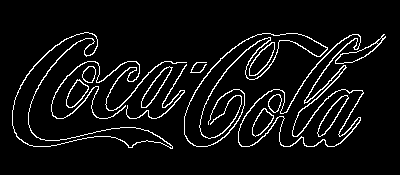

In [ ]:
patternPath="/content/sample_data/pattern.png"
# load the image image, convert it to grayscale, and detect edges
template = cv.imread(patternPath)
template = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
template = cv.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
cv2_imshow( template)

## Busquedas Individuales

Para realizar este análisis se implemetaron unas funciones que permitan cargar la imagen y realizarle los ajustes necesarios que permitan mejorar el perfomance del algoritmo cv.matchTemplate. El mismo es sensible a la relación de escalas entre el objeto que estamos intentando encontrar y la imagen en la que estariamos realizando la busqueda.

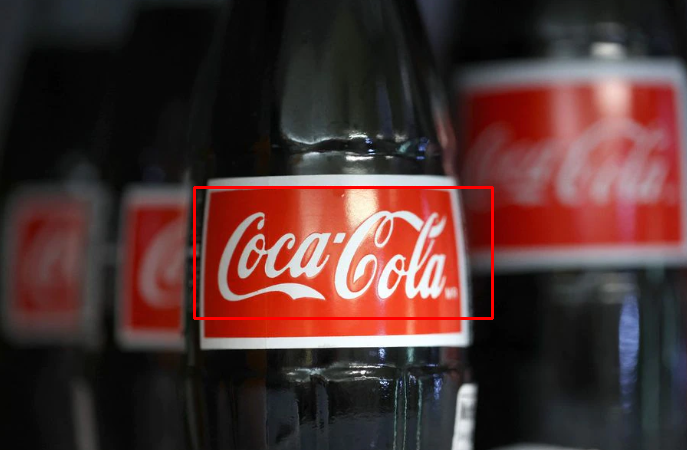

Scores de confianza:


In [ ]:
imagePath1 = "/content/sample_data/logo_1.png"
template_matching(imagePath1, patternPath, visualize=True)


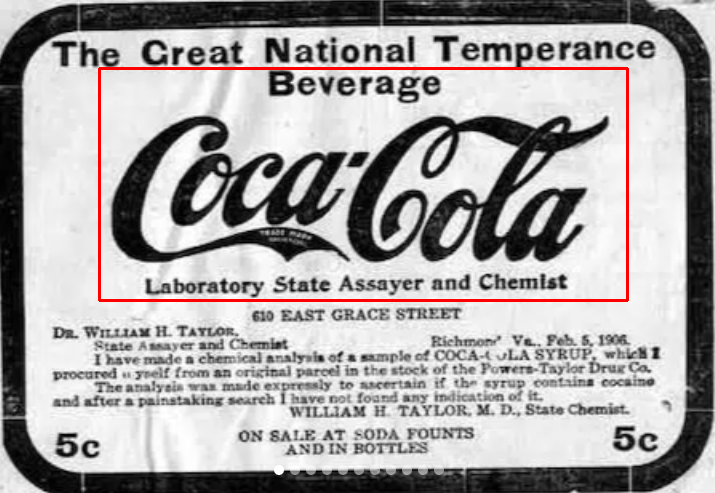

In [ ]:
imagePath5 = "/content/sample_data/coca_retro_1.png"
template_matching(imagePath5, patternPath, visualize=True)


# Busqueda mediante Loop en el directorio

Se implemento una sencilla función que permite ubicar en un directorio todas las imagenes cuya extensión sea **".jpg"** o ***".png"** que son extensiones propias de archivos de imagenes.

Se define en primera instancia el path o directorio general donde se contienen todas las imagenes.

In [ ]:
image_path = '/content/images'

files = read_from_path("/content/sample_data/")
files_not_pattern = [file for file in files if file not in patternPath]
files_not_pattern



['/content/sample_data/coca_multi.png',
 '/content/sample_data/coca_logo_2.png',
 '/content/sample_data/logo_1.png',
 '/content/sample_data/coca_retro_2.png',
 '/content/sample_data/COCA-COLA-LOGO.jpg',
 '/content/sample_data/coca_logo_1.png',
 '/content/sample_data/coca_retro_1.png']

Se ejecuta el loop y se aplica la función de matching

**template_matching(image_path, pattern_path, visualize=True)**

In [ ]:
# Ejecución en loop
for path in files_not_pattern:
  template_matching(path, patternPath, visualize=True)

Output hidden; open in https://colab.research.google.com to view.

# Revisión de la imagen con multiples coincidencias.

Por último queda la busqueda para multiples coincidencias.


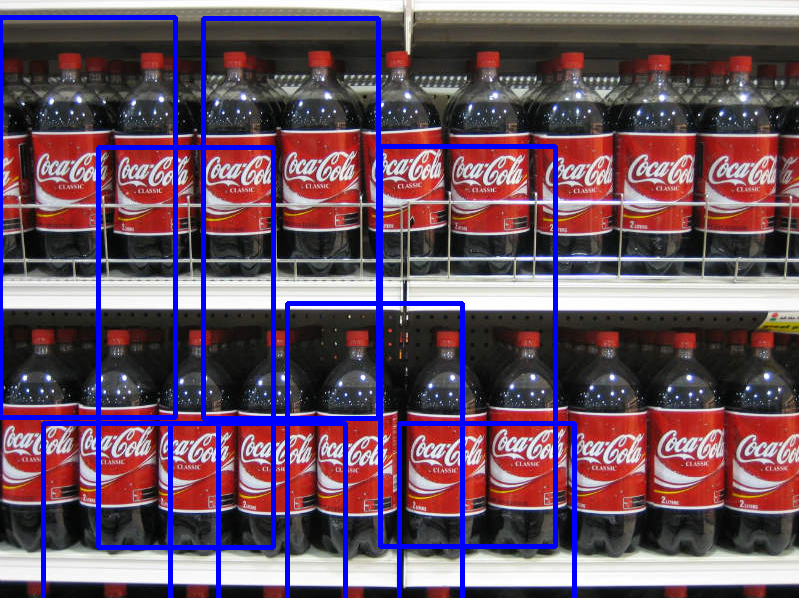

In [ ]:
#Lectura de la imagen
img = cv.imread("/content/sample_data/coca_multi.png")
temp = cv.imread(patternPath)

# Acceso a las coordenadas
W, H = temp.shape[:2]

# Defino el umbral mínimo
thresh = 0.09

# PAsaje a escala de grises
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
temp_gray = cv.cvtColor(temp, cv.COLOR_BGR2GRAY)

# PAsaje del parámetro al algoritmo "cv.matchTemplate"
match = cv.matchTemplate(
    image=img_gray, templ=temp_gray,
  method=cv.TM_CCOEFF_NORMED)

# Selecciona los rectángulos para
# confianza superior al threshold
(y_points, x_points) = np.where(match >= thresh)

# Inicializa la lista
boxes = list()

# loop sobre las coordenadas
for (x, y) in zip(x_points, y_points):

    # Actualiza los rectángulos
    boxes.append((x, y, x + W, y + H))

# aplicar supresión no máxima a los rectángulos
# esto creará un único cuadro delimitador
boxes = non_max_suppression(np.array(boxes))


# recorrer los cuadros delimitadores finales
for (x1, y1, x2, y2) in boxes:

    # dibuja los cuadros
    cv.rectangle(img, (x1, y1), (x2, y2),
                  (255, 0, 0), 3)

# Muestra las imagenes
cv2_imshow(img)
